## Process Files

In [1]:
# import functions
import re
import pandas as pd
import string
import numpy as np
import nltk
from nltk import pos_tag
from nltk.tag import StanfordNERTagger
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD, SparsePCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning

renaissance = pd.read_csv('/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/english/datasets/renaissance_adj-tagged.csv')
re_unfeatured = renaissance.head(50)
re_featured = renaissance.head(50)
re_featured.tail()
# print(type(re_featured['adj_tag'][0]))

,author,content,poem name,age,type,clean_content,tok_clean_content,nostop_clean_content,lemmatized_content,all_nouns,tok_all_nouns,sentiment_detailed,sentiment,dep_nouns,dep_adjs,adj_tag
45,SIR PHILIP SIDNEY,"With how sad steps, O Moon, thou climb'st the ...","Astrophil and Stella 31: With how sad steps, O...",Renaissance,Nature,With how sad steps O Moon thou climb st the ...,"['with', 'how', 'sad', 'steps', 'o', 'moon', '...","['sad', 'steps', 'moon', 'climb', 'st', 'skies...","['sad', 'step', 'moon', 'climb', 'st', 'sky', ...",step moon climb st sky face place try sure lov...,"['step', 'moon', 'climb', 'st', 'sky', 'face',...",sad,negative,"['steps', 'archer', 'arrows', 'eyes', 'love']","['sad', 'busy', 'sharp', 'acquainted', 'consta...","['negative', 'negative', 'negative', 'positive..."
46,SIR PHILIP SIDNEY,"When Nature made her chief work, Stella's eyes...",Astrophil and Stella 7: When Nature made her c...,Renaissance,Nature,When Nature made her chief work Stella s eyes...,"['when', 'nature', 'made', 'her', 'chief', 'wo...","['nature', 'made', 'chief', 'work', 'stella', ...","['nature', 'made', 'chief', 'work', 'stella', ...",nature work stella eye wrapt beam bright paint...,"['nature', 'work', 'stella', 'eye', 'wrapt', '...",devout,positive,"['work', 'colour', 'black', 'hue', 'object', '...","['black', 'beamy', 'sober', 'best', 'brave', '...","['negative', 'positive', 'negative', 'positive..."
47,JOHN DONNE,"Come live with me, and be my love,\nAnd we wil...",The Bait,Renaissance,Nature,Come live with me and be my love And we wil...,"['come', 'live', 'with', 'me', 'and', 'be', 'm...","['come', 'live', 'love', 'new', 'pleasures', '...","['come', 'live', 'love', 'new', 'pleasure', 'p...",pleasure sand crystal brook line silver hook r...,"['pleasure', 'sand', 'crystal', 'brook', 'line...",devout,positive,"['pleasures', 'sands', 'brooks', 'run', 'bath'...","['new', 'golden', 'crystal', 'Warm', 'live', '...","['positive', 'positive', 'positive', 'positive..."
48,JOHN DONNE,"Our storm is past, and that storm's tyrannous ...",The Calm,Renaissance,Nature,Our storm is past and that storm s tyrannous ...,"['our', 'storm', 'is', 'past', 'and', 'that', ...","['storm', 'past', 'storm', 'tyrannous', 'rage'...","['storm', 'past', 'storm', 'tyrannous', 'rage'...",storm storm rage calm nothing suage afflicts s...,"['storm', 'storm', 'rage', 'calm', 'nothing', ...",serious,negative,"['rage', 'calm', 'block', 'plays', 'the', 'use...","['tyrannous', 'stupid', 'more', 'ended', 'tack...","['negative', 'negative', 'negative', 'negative..."
49,JOHN DONNE,"Where, like a pillow on a bed\n A preg...",The Ecstasy,Renaissance,Nature,Where like a pillow on a bed A preg...,"['where', 'like', 'a', 'pillow', 'on', 'a', 'b...","['like', 'pillow', 'bed', 'pregnant', 'bank', ...","['like', 'pillow', 'bed', 'pregnant', 'bank', ...",bed bank swell violet head hand thence spring ...,"['bed', 'bank', 'swell', 'violet', 'head', 'ha...",serious,positive,"['swell', 'head', 'balm', 'string', 'fate', 'v...","['pregnant', 'reclining', 'fast', 'double', 'e...","['negative', 'positive', 'positive', 'positive..."


In [2]:
re_unfeatured.head()

,author,content,poem name,age,type,clean_content,tok_clean_content,nostop_clean_content,lemmatized_content,all_nouns,tok_all_nouns,sentiment_detailed,sentiment,dep_nouns,dep_adjs,adj_tag
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\nOn the sole Arabi...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,Let the bird of loudest lay On the sole Arabi...,"['let', 'the', 'bird', 'of', 'loudest', 'lay',...","['let', 'bird', 'loudest', 'lay', 'sole', 'ara...","['let', 'bird', 'loudest', 'lay', 'sole', 'ara...",bird lay tree herald trumpet chaste harbinger ...,"['bird', 'lay', 'tree', 'herald', 'trumpet', '...",didactic,positive,"['bird', 'sad', 'tree', 'wings', 'precurrer', ...","['loudest', 'sole', 'chaste', 'fiend', 'wing',...","['negative', 'negative', 'positive', 'negative..."
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\nWhen I...",An Epilogue to the Above,Renaissance,Mythology & Folklore,Sir Charles into my chamber coming in When I...,"['sir', 'charles', 'into', 'my', 'chamber', 'c...","['sir', 'charles', 'chamber', 'coming', 'writi...","['sir', 'charles', 'chamber', 'coming', 'writi...",sir charles fairy queen hewhen queen mab servi...,"['sir', 'charles', 'fairy', 'queen', 'hewhen',...",storytelling,positive,"['report', 'Both', 'court', 'garment', 'service']","['loud', 'beauty', 'stately', 'thin', 'humble']","['negative', 'positive', 'positive', 'positive..."
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\nAn...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,Our vice runs beyond all that old men saw An...,"['our', 'vice', 'runs', 'beyond', 'all', 'that...","['vice', 'runs', 'beyond', 'old', 'men', 'saw'...","['vice', 'run', 'beyond', 'old', 'men', 'saw',...",vice men law mean sits extreme circe monster h...,"['vice', 'men', 'law', 'mean', 'sits', 'extrem...",bitter,negative,"['men', 'mean', 'extreme', 'filthiness', 'Circ...","['old', 'golden', 'high', 'feigned', 'filthine...","['negative', 'positive', 'positive', 'negative..."
3,RICHARD BARNFIELD,"Long have I longd to see my love againe,\nStil...",Sonnet 16,Renaissance,Mythology & Folklore,Long have I longd to see my love againe Stil...,"['long', 'have', 'i', 'longd', 'to', 'see', 'm...","['long', 'longd', 'see', 'love', 'againe', 'st...","['long', 'longd', 'see', 'love', 'againe', 'st...",longd againe world gaine day see countenaunce ...,"['longd', 'againe', 'world', 'gaine', 'day', '...",sad,negative,"['gaine', 'countenaunce', 'continuance', 'what...","['precious', 'sterne', 'long', 'continuance', ...","['positive', 'negative', 'negative', 'negative..."
4,RICHARD BARNFIELD,"Cherry-lipt Adonis in his snowie shape,\n M...",Sonnet 17,Renaissance,Mythology & Folklore,Cherry lipt Adonis in his snowie shape M...,"['cherry', 'lipt', 'adonis', 'in', 'his', 'sno...","['cherry', 'lipt', 'adonis', 'snowie', 'shape'...","['cherry', 'lipt', 'adonis', 'snowie', 'shape'...",cherry lipt adonis snowie shape faire front po...,"['cherry', 'lipt', 'adonis', 'snowie', 'shape'...",sad,negative,"['ivorie', 'red', 'grape', 'limbs', 'eies', 't...","['white', 'roseate', 'crimson', 'soft', 'framd...","['negative', 'positive', 'negative', 'positive..."


## Feature extraction

### Text-based features

In [3]:
eliza_stw = ['adieu', 'anon', 'attend', 'aye', 'but soft', 'doth', "e'en", "e'er", 'haply', 'hence', 'hither', 'sirrah', 'thee', 'thither', 'thou', 'thou art', 'thy', 'whence', 'wilt', 'withal', 'hath']
stw = stopwords.words('english') + eliza_stw

def count_words(text):
    return len(str(text).split())

def count_uniquewords(text):
    return len(set(str(text).split()))

def count_chars(text):
    return len(str(text))

def word_density(text):
    return count_chars(text) / (count_words(text) + 1)

def count_stopwords(text):
    stopwords = [word for word in str(text).split() if word in stw]
    return len(stopwords)

def count_puncts(text):
    puncts = re.findall('[' + string.punctuation + ']' + '\n' + '\r', str(text))
    return len(puncts)

def count_upperwords(text):
    upperwords = re.findall(r"\b[A-Z0-9]+\b", str(text))
    return len(upperwords)

def count_lines(text):
    lines = 0
    for i in text:
        if i == '\n':
            lines = lines + 1
    return lines + 1

def count_num_positive_imagery(text):
    cnt = 0
    for each in text:
        if each == 'p':
            cnt+=1
    all = count_num_all_imagery(text)
    return cnt / all

def count_num_negative_imagery(text):
    cnt = 0
    for each in text:
        if each == 'n':
            cnt+=1
    all = count_num_all_imagery(text)
    if (all != 0):
        return cnt / all
    else:
        return 0.5

def count_num_all_imagery(text):
    cnt = 1
    for each in text:
        if (each == ","):
            cnt += 1
    return cnt

### NLP-based features

In [4]:
pos_dic = {
    "NN" : "noun", "NNS" : "noun", "NNP": "noun", "NNPS" : "noun",
    "PRP" : "pron", "PRP$" : "pron", "WP" : "pron", "WP$" : "pron",
    "VB" : "verb", "VBD" : "verb", "VBG" : "verb", "VBN" : "verb", "VBP" : "verb", "VBZ": "verb",
    "JJ" : "adj", "JJR" : "adj", "JJS" : "adj",
    "RB"  : "adv", "RBR" : "adv", "RBS" : "adv", "WRB" : "adj"
}

def count_tag_noun(text):
    pos_counts = 0
    for each in pos_tag(str(text).split()):
        if each[1] == 'NN' or each[1] == 'NNP' or each[1] == 'NNPS' or each[1] == 'NNS':
            pos_counts = pos_counts + 1
    return pos_counts

def count_tag_pron(text):
    pos_counts = 0
    for each in pos_tag(str(text).split()):
        if each[1] == 'PRP' or each[1] == 'PRP$' or each[1] == 'WP' or each[1] == 'WP$':
            pos_counts = pos_counts + 1
    return pos_counts

def count_tag_verb(text):
    pos_counts = 0
    for each in pos_tag(str(text).split()):
        if each[1] == 'VB' or each[1] == 'VBD' or each[1] == 'VBG' or each[1] == 'VBN' or each[1] == 'VBP' or each[1] == 'VBZ':
            pos_counts = pos_counts + 1
    return pos_counts

def count_tag_adj(text):
    pos_counts = 0
    for each in pos_tag(str(text).split()):
        if each[1] == 'JJ' or each[1] == 'JJR' or each[1] == 'JJS':
            pos_counts = pos_counts + 1
    return pos_counts

def count_tag_adv(text):
    pos_counts = 0
    for each in pos_tag(str(text).split()):
        if each[1] == 'RB' or each[1] == 'RBR' or each[1] == 'RBS' or each[1] == 'WRB':
            pos_counts = pos_counts + 1
    return pos_counts

## Train Model Without Feature Engineering

In [5]:
# Using TF-IDF
vectorizer = TfidfVectorizer()
re_unfeatured_text = vectorizer.fit_transform(re_unfeatured['lemmatized_content']).toarray()
print(re_unfeatured_text.shape)

(50, 3516)


In [6]:
re_unfeatured_tfidf = pd.DataFrame(re_unfeatured_text)
re_unfeatured_targeted = re_unfeatured.sentiment
X_train_reu, X_test_reu, y_train_reu, y_test_reu = train_test_split(re_unfeatured_tfidf, re_unfeatured_targeted ,test_size=0.3, random_state=42)

### Random Forest

              precision    recall  f1-score   support

    negative       0.71      0.45      0.56        11
    positive       0.25      0.50      0.33         4

    accuracy                           0.47        15
   macro avg       0.48      0.48      0.44        15
weighted avg       0.59      0.47      0.50        15

--------------The Accuracy of the model----------------------------
Accuracy of Random Forest on test set: 0.46666667


Text(0.5, 1.05, 'Confusion_matrix')

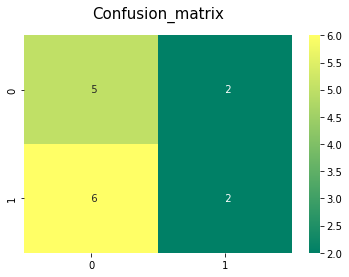

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

umodel1 = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
umodel1.fit(X_train_reu, y_train_reu)
y_pred_rm1 = umodel1.predict(X_test_reu)
print(metrics.classification_report(y_pred_rm1, y_test_reu))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of Random Forest on test set: {:.8f}'.format(accuracy_score(y_pred_rm1, y_test_reu)))

sns.heatmap(confusion_matrix(y_test_reu,y_pred_rm1),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Multinomial Naive Bayes

              precision    recall  f1-score   support

    negative       0.14      0.33      0.20         3
    positive       0.75      0.50      0.60        12

    accuracy                           0.47        15
   macro avg       0.45      0.42      0.40        15
weighted avg       0.63      0.47      0.52        15

--------------The Accuracy of the model----------------------------
Accuracy of Multinomial Naive Bayes on test set: 0.46666667


Text(0.5, 1.05, 'Confusion_matrix')

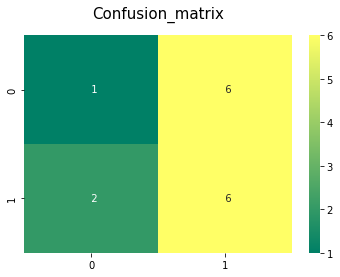

In [8]:
from sklearn.naive_bayes import MultinomialNB

multinomialnb = MultinomialNB()
multinomialnb.fit(X_train_reu, y_train_reu)
y_pred_rm2 = multinomialnb.predict(X_test_reu)
print(metrics.classification_report(y_pred_rm2, y_test_reu))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of Multinomial Naive Bayes on test set: {:.8f}'.format(accuracy_score(y_pred_rm2, y_test_reu)))

sns.heatmap(confusion_matrix(y_test_reu,y_pred_rm2),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Support Vector Machine (SVM)

              precision    recall  f1-score   support

    negative       0.14      0.33      0.20         3
    positive       0.75      0.50      0.60        12

    accuracy                           0.47        15
   macro avg       0.45      0.42      0.40        15
weighted avg       0.63      0.47      0.52        15

--------------The Accuracy of the model----------------------------
Accuracy of SVM on test set: 0.46666667


Text(0.5, 1.05, 'Confusion_matrix')

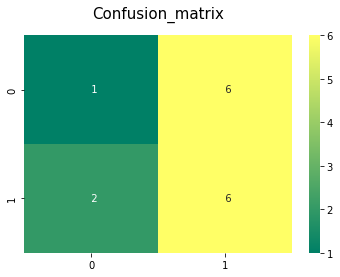

In [9]:
from sklearn.svm import LinearSVC

linearsvc = LinearSVC()

linearsvc.fit(X_train_reu, y_train_reu)
y_pred_rm3 = linearsvc.predict(X_test_reu)
print(metrics.classification_report(y_pred_rm3, y_test_reu))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of SVM on test set: {:.8f}'.format(accuracy_score(y_pred_rm3, y_test_reu)))

sns.heatmap(confusion_matrix(y_test_reu,y_pred_rm3),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Train Model With Feature Engineering

In [10]:
re_featured['word_count'] = re_featured['content'].apply(lambda x:count_words(x))
re_featured['unique_word_count'] = re_featured['content'].apply(lambda x:count_uniquewords(x))
re_featured['char_count'] = re_featured['content'].apply(lambda x:count_chars(x))
re_featured['cal_word_density'] = re_featured['content'].apply(lambda x:word_density(x))
re_featured['stopword_count'] = re_featured['content'].apply(lambda x:count_stopwords(x))
re_featured['punct_count'] = re_featured['content'].apply(lambda x:count_puncts(x))
re_featured['line_count'] = re_featured['content'].apply(lambda x:count_lines(x))
re_featured['unique_vs_words'] = re_featured['unique_word_count']/re_featured['word_count']
re_featured['stop_vs_words'] = re_featured['stopword_count']/re_featured['word_count']
re_featured['upperword_count'] = re_featured['content'].apply(lambda x:count_upperwords(x))
re_featured['pos_count_noun'] = re_featured['content'].apply(lambda x:count_tag_noun(x))
re_featured['pos_count_verb'] = re_featured['content'].apply(lambda x:count_tag_verb(x))
re_featured['pos_count_pron'] = re_featured['content'].apply(lambda x:count_tag_pron(x))
re_featured['pos_count_adj'] = re_featured['content'].apply(lambda x:count_tag_adj(x))
re_featured['pos_count_adv'] = re_featured['content'].apply(lambda x:count_tag_adv(x))
re_featured['count_positive'] = re_featured['adj_tag'].apply(lambda x:count_num_positive_imagery(x))
re_featured['count_negative'] = re_featured['adj_tag'].apply(lambda x:count_num_negative_imagery(x))

re_featured.head(5)

/var/folders/vd/5g8qdg_17s911457c0s_h84w0000gn/T/ipykernel_49968/4077918113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_featured['word_count'] = re_featured['content'].apply(lambda x:count_words(x))
/var/folders/vd/5g8qdg_17s911457c0s_h84w0000gn/T/ipykernel_49968/4077918113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_featured['unique_word_count'] = re_featured['content'].apply(lambda x:count_uniquewords(x))
/var/folders/vd/5g8qdg_17s911457c0s_h84w0000gn/T/ipykernel_49968/4077918113.py:

,author,content,poem name,age,type,clean_content,tok_clean_content,nostop_clean_content,lemmatized_content,all_nouns,...,unique_vs_words,stop_vs_words,upperword_count,pos_count_noun,pos_count_verb,pos_count_pron,pos_count_adj,pos_count_adv,count_positive,count_negative
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\nOn the sole Arabi...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,Let the bird of loudest lay On the sole Arabi...,"['let', 'the', 'bird', 'of', 'loudest', 'lay',...","['let', 'bird', 'loudest', 'lay', 'sole', 'ara...","['let', 'bird', 'loudest', 'lay', 'sole', 'ara...",bird lay tree herald trumpet chaste harbinger ...,...,0.699717,0.334278,0,128,48,17,34,17,0.555556,0.444444
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\nWhen I...",An Epilogue to the Above,Renaissance,Mythology & Folklore,Sir Charles into my chamber coming in When I...,"['sir', 'charles', 'into', 'my', 'chamber', 'c...","['sir', 'charles', 'chamber', 'coming', 'writi...","['sir', 'charles', 'chamber', 'coming', 'writi...",sir charles fairy queen hewhen queen mab servi...,...,0.743119,0.302752,8,35,22,19,6,3,0.800000,0.200000
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\nAn...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,Our vice runs beyond all that old men saw An...,"['our', 'vice', 'runs', 'beyond', 'all', 'that...","['vice', 'runs', 'beyond', 'old', 'men', 'saw'...","['vice', 'run', 'beyond', 'old', 'men', 'saw',...",vice men law mean sits extreme circe monster h...,...,0.796610,0.322034,0,19,7,5,6,2,0.400000,0.600000
3,RICHARD BARNFIELD,"Long have I longd to see my love againe,\nStil...",Sonnet 16,Renaissance,Mythology & Folklore,Long have I longd to see my love againe Stil...,"['long', 'have', 'i', 'longd', 'to', 'see', 'm...","['long', 'longd', 'see', 'love', 'againe', 'st...","['long', 'longd', 'see', 'love', 'againe', 'st...",longd againe world gaine day see countenaunce ...,...,0.706897,0.284483,10,36,26,18,6,7,0.200000,0.800000
4,RICHARD BARNFIELD,"Cherry-lipt Adonis in his snowie shape,\n M...",Sonnet 17,Renaissance,Mythology & Folklore,Cherry lipt Adonis in his snowie shape M...,"['cherry', 'lipt', 'adonis', 'in', 'his', 'sno...","['cherry', 'lipt', 'adonis', 'snowie', 'shape'...","['cherry', 'lipt', 'adonis', 'snowie', 'shape'...",cherry lipt adonis snowie shape faire front po...,...,0.851485,0.227723,0,42,15,10,9,4,0.500000,0.500000


In [11]:
# # Using TF-IDF
vectorizer2 = TfidfVectorizer()
re_featured_text = vectorizer2.fit_transform(re_featured['content']).toarray()
print(re_featured_text.shape)

(50, 3884)


In [12]:
re_featured_tfidf = pd.DataFrame(re_featured_text)
re_featured_targeted = re_unfeatured.sentiment
"""
'word_count', 'unique_word_count', 'char_count',
       'cal_word_density', 'stopword_count', 'punct_count',
       'line_count', 'unique_vs_words', 'stop_vs_words', 'upperword_count',
       'pos_count_noun', 'pos_count_verb', 'pos_count_adj', 'pos_count_pron',
       'pos_count_adv',
"""
features = ['count_positive', 'count_negative']
re_featured_all = pd.merge(re_featured_tfidf,re_featured[features],left_index=True, right_index=True)
X_train_ref, X_test_ref, y_train_ref, y_test_ref = train_test_split(re_featured_all, re_featured_targeted ,test_size=0.3, random_state=42)

### Random Forest

/Users/jojoli/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.71      0.50      0.59        10
    positive       0.38      0.60      0.46         5

    accuracy                           0.53        15
   macro avg       0.54      0.55      0.52        15
weighted avg       0.60      0.53      0.55        15

--------------The Accuracy of the model----------------------------
Accuracy of Random Forest on test set: 0.53333333


/Users/jojoli/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.05, 'Confusion_matrix')

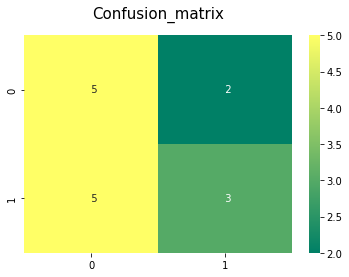

In [13]:
# Random Forest
import seaborn as sns
import matplotlib.pyplot as plt

fmodel1 = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
fmodel1.fit(X_train_ref, y_train_ref)
y_pred_rm4 = fmodel1.predict(X_test_ref)
print(metrics.classification_report(y_pred_rm4, y_test_ref))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of Random Forest on test set: {:.8f}'.format(accuracy_score(y_pred_rm4, y_test_ref)))

sns.heatmap(confusion_matrix(y_test_ref,y_pred_rm4),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Multinomial Naive Bayes

              precision    recall  f1-score   support

    negative       0.14      1.00      0.25         1
    positive       1.00      0.57      0.73        14

    accuracy                           0.60        15
   macro avg       0.57      0.79      0.49        15
weighted avg       0.94      0.60      0.70        15

--------------The Accuracy of the model----------------------------
Accuracy of Multinomial Naive Bayes on test set: 0.60000000


/Users/jojoli/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/jojoli/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.05, 'Confusion_matrix')

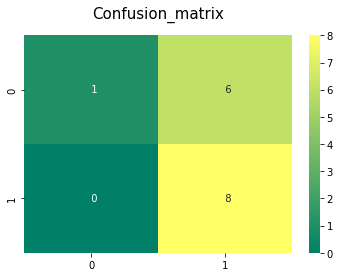

In [14]:
multinomialnb2 = MultinomialNB()
multinomialnb2.fit(X_train_ref, y_train_ref)
y_pred_rm5 = multinomialnb2.predict(X_test_ref)
print(metrics.classification_report(y_pred_rm5, y_test_ref))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of Multinomial Naive Bayes on test set: {:.8f}'.format(accuracy_score(y_pred_rm5, y_test_ref)))

sns.heatmap(confusion_matrix(y_test_ref,y_pred_rm5),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Support Vector Machine (SVM)

              precision    recall  f1-score   support

    negative       0.86      0.86      0.86         7
    positive       0.88      0.88      0.88         8

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

--------------The Accuracy of the model----------------------------
Accuracy of SVM on test set: 0.86666667


/Users/jojoli/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/jojoli/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.05, 'Confusion_matrix')

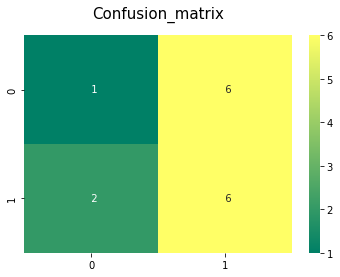

In [15]:
linearsvc = LinearSVC()

linearsvc.fit(X_train_ref, y_train_ref)
y_pred_rm6 = linearsvc.predict(X_test_ref)
print(metrics.classification_report(y_pred_rm6, y_test_ref))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of SVM on test set: {:.8f}'.format(accuracy_score(y_pred_rm6, y_test_ref)))

sns.heatmap(confusion_matrix(y_test_ref,y_pred_rm2),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [41]:
re_featured.to_csv("/Users/jojoli/Documents/夏校申请:项目制作/英才计划/正式培养/english/datasets/renaissance_featured.csv")

## Coreference Resolution + Feature Engineering

In [18]:
# 是否可以在coreference resolution的基础上进行feature engineering
# Add the number of positive and negative imageries according to the results in
    # coreference resolution to feature engineering and then train with the same models
# 存储标注：https://blog.csdn.net/Itsme_MrJJ/article/details/123830831

In [20]:
import functions
# Use the last function of en_functions.py and read the csv file
# Train model